In [1]:
import sys
import subprocess
import numpy as np
import pandas as pd
import scipy.io as sio

import os

from core import *

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.cluster import normalized_mutual_info_score

import matplotlib.pyplot as plt


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

In [16]:
data_folder='~/Bcells/GitHub/Bit/Data/'

In [35]:
table_summary= pd.DataFrame(columns=['Data','sen_short','sen_mid_a','sen_mid_b','sen_long','spec_short','spec_mid_a','spec_mid_b','spec_long','ppv_short','ppv_mid_a','ppv_mid_b','ppv_long'])

In [36]:
table_summary_my= pd.DataFrame(columns=['Data','sen_short','sen_mid_a','sen_mid_b','sen_long','spec_short','spec_mid_a','spec_mid_b','spec_long','ppv_short','ppv_mid_a','ppv_mid_b','ppv_long'])

In [37]:
table_a= pd.DataFrame(columns=['clone','table','ig'])

In [38]:
for i in range (1,30):

        table_a=table_a.append({'clone':data_folder+'clone_dataMS4_v'+str(i)+'.csv','table': data_folder+'sim_dataMS4_v'+str(i)+'.csv' ,'ig': data_folder+'sampleMS4_o'+str(i)+'_germ-pass.tab' }, ignore_index=True)


In [39]:
for i in range (1,29):
 
        table_a=table_a.append({'clone':data_folder+'clone_dataMS3_v'+str(i)+'.csv','table': data_folder+'SimData/sim_dataMS3_v'+str(i)+'.csv' ,'ig': data_folder+'sampleMS3_o'+str(i)+'_germ-pass.tab' }, ignore_index=True)

In [40]:
for i in range(0,55):
    table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])

    table_short=table_full.SEQUENCE[table_ig.SEQUENCE_ID-1]
    clone_list_short=table_clone.values[table_ig.SEQUENCE_ID-1][:,1]
 
    table_clone_list=np.copy(clone_list_short)
    len_vec=table_ig.JUNCTION_LENGTH.values

       
    m_short=np.where(len_vec<45)[0]
    m_mid_a=np.where((54>len_vec) & (np.greater_equal(len_vec,45)))[0]#np.where((45>len_vec) & (len_vec>=30))[0]
    m_mid_b=np.where((63>len_vec) & (np.greater_equal(len_vec,54)))[0]
    m_long=np.where(np.greater_equal(len_vec,63))[0]

    labels_list_short,cloned_list_full_short=clone_inference(table_clone_list[m_short],table_ig.CLONE[m_short])
   
    sensitivity_short=sum(cloned_list_full_short[np.where(labels_list_short==1)]==1)/sum(labels_list_short==1)
    print('sensitivity=',sensitivity_short)
    ppv_short=sum(labels_list_short[np.where(cloned_list_full_short==1)]==1)/sum(cloned_list_full_short==1)
    print('PPV=',ppv_short)
    specificity_short=sum(cloned_list_full_short[np.where(labels_list_short==0)]==0)/sum(labels_list_short==0)
    print('specificity=',specificity_short)
    
    labels_list_mid_a,cloned_list_full_mid_a=clone_inference(table_clone_list[m_mid_a],table_ig.CLONE[m_mid_a])
    sensitivity_mid_a=sum(cloned_list_full_mid_a[np.where(labels_list_mid_a==1)]==1)/sum(labels_list_mid_a==1)
    print('sensitivity=',sensitivity_mid_a)
    ppv_mid_a=sum(labels_list_mid_a[np.where(cloned_list_full_mid_a==1)]==1)/sum(cloned_list_full_mid_a==1)
    print('PPV=',ppv_mid_a)
    specificity_mid_a=sum(cloned_list_full_mid_a[np.where(labels_list_mid_a==0)]==0)/sum(labels_list_mid_a==0)
    print('specificity=',specificity_mid_a)
    
    
    labels_list_mid_b,cloned_list_full_mid_b=clone_inference(table_clone_list[m_mid_b],table_ig.CLONE[m_mid_b])
    sensitivity_mid_b=sum(cloned_list_full_mid_b[np.where(labels_list_mid_b==1)]==1)/sum(labels_list_mid_b==1)
    print('sensitivity=',sensitivity_mid_b)
    ppv_mid_b=sum(labels_list_mid_b[np.where(cloned_list_full_mid_b==1)]==1)/sum(cloned_list_full_mid_b==1)
    print('PPV=',ppv_mid_b)
    specificity_mid_b=sum(cloned_list_full_mid_b[np.where(labels_list_mid_b==0)]==0)/sum(labels_list_mid_b==0)
    print('specificity=',specificity_mid_b)
    
    labels_list_long,cloned_list_full_long=clone_inference(table_clone_list[m_long],table_ig.CLONE[m_long])
    sensitivity_long=sum(cloned_list_full_long[np.where(labels_list_long==1)]==1)/sum(labels_list_long==1)
    print('sensitivity=',sensitivity_long)
    ppv_long=sum(labels_list_long[np.where(cloned_list_full_long==1)]==1)/sum(cloned_list_full_long==1)
    print('PPV=',ppv_long)
    specificity_long=sum(cloned_list_full_long[np.where(labels_list_long==0)]==0)/sum(labels_list_long==0)
    print('specificity=',specificity_long)
    
    
    table_summary=table_summary.append({'Data': i,'sen_short': sensitivity_short ,'sen_mid_a': sensitivity_mid_a,'sen_mid_b': sensitivity_mid_b,'sen_long': sensitivity_long,'spec_short': specificity_short ,'spec_mid_a': specificity_mid_a ,'spec_mid_b': specificity_mid_b,'spec_long': specificity_long,'ppv_short': ppv_short ,'ppv_mid_a': ppv_mid_a ,'ppv_mid_b': ppv_mid_b,'ppv_long': ppv_long}, ignore_index=True)

/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9987980769230769
PPV= 0.9995990376904571
specificity= 0.998212689901698
sensitivity= 0.9997191405701447
PPV= 0.9988775080679108
specificity= 0.9955456570155902
sensitivity= 1.0
PPV= 0.9995424736922373
specificity= 0.9982973893303064
sensitivity= 0.9998061639852684
PPV= 0.9999030725986237
specificity= 0.9995019920318725


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9970263381478335
PPV= 0.9972381559379647
specificity= 0.98861646234676
sensitivity= 0.9993923742974328
PPV= 0.9986338797814208
specificity= 0.9951086956521739
sensitivity= 0.999853135555882
PPV= 0.9994128009395185
specificity= 0.9976918638199653
sensitivity= 0.9998731930002536
PPV= 0.9994929648878185
specificity= 0.997946611909651


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9994470555709152
PPV= 0.9975165562913907
specificity= 0.9919571045576407
sensitivity= 0.9991934182932731
PPV= 0.9995158947878006
specificity= 0.9983552631578947
sensitivity= 0.9991369390103567
PPV= 0.9994244604316547
specificity= 0.9976905311778291
sensitivity= 0.9998683170924414
PPV= 0.9994734763722523
specificity= 0.9979068550497122


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9995768091409225
PPV= 0.9991539763113367
specificity= 0.9963436928702011
sensitivity= 0.9991142604074402
PPV= 0.9995569339831635
specificity= 0.9977678571428571
sensitivity= 0.9998644619137977
PPV= 0.9994580680124644
specificity= 0.9977413890457368
sensitivity= 0.999882297551789
PPV= 0.999059155592144
specificity= 0.9959534648457259


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9997412677878396
PPV= 0.9984496124031008
specificity= 0.9945602901178604
sensitivity= 0.9997420353411582
PPV= 0.9994842037395228
specificity= 0.9977401129943503
sensitivity= 0.9998911386893098
PPV= 0.9996734871571615
specificity= 0.998262883613202
sensitivity= 0.9998540359071668
PPV= 0.9988334791484398
specificity= 0.9959636730575177


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9997516145057128
PPV= 0.9987593052109182
specificity= 0.9956369982547993
sensitivity= 0.9992910818091593
PPV= 0.9998581359058022
specificity= 0.9994505494505495
sensitivity= 0.9996866677111076
PPV= 1.0
specificity= 1.0
sensitivity= 0.9996387718242022
PPV= 0.9996387718242022
specificity= 0.9984932194876946


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9983242563887725
PPV= 0.9989520016767973
specificity= 0.9956024626209323
sensitivity= 0.9997406975236613
PPV= 0.9992224957885188
specificity= 0.9966517857142857
sensitivity= 1.0
PPV= 0.999671592775041
specificity= 0.9988636363636364
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9992173742907454
PPV= 0.999412915851272
specificity= 0.9973521624007061
sensitivity= 0.999845512127298
PPV= 0.9993823347745522
specificity= 0.9977851605758582
sensitivity= 0.9997362521429514
PPV= 1.0
specificity= 1.0
sensitivity= 0.9997402260033771
PPV= 0.9997402260033771
specificity= 0.9989577905158937


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9967855994856959
PPV= 0.9990335051546392
specificity= 0.9973404255319149
sensitivity= 0.9995778215592457
PPV= 0.9998592342342343
specificity= 0.9994353472614342
sensitivity= 0.9997583081570997
PPV= 0.9990339330998672
specificity= 0.9954519613416714
sensitivity= 0.9997340425531915
PPV= 0.9994682265354958
specificity= 0.9979349509550852


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9989016161933155
PPV= 0.9996859296482412
specificity= 0.9982471516213848
sensitivity= 0.9995169082125603
PPV= 0.9990342829550941
specificity= 0.996594778660613
sensitivity= 0.9996651038178165
PPV= 1.0
specificity= 1.0
sensitivity= 0.9998842458617896
PPV= 0.9997685185185186
specificity= 0.9989588755856325


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.999211356466877
PPV= 0.9994740993952143
specificity= 0.9982030548068284
sensitivity= 0.9992076069730587
PPV= 0.9996036464526358
specificity= 0.9983452840595698
sensitivity= 0.9997434581836839
PPV= 0.9998717126363054
specificity= 0.9994282447112636
sensitivity= 0.9999067685996643
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 1.0
PPV= 0.999591419816139
specificity= 0.9981566820276497
sensitivity= 0.9994788952579469
PPV= 0.9998262380538662
specificity= 0.9994484280198566
sensitivity= 0.9998601789709173
PPV= 0.9994409503843467
specificity= 0.9977753058954394
sensitivity= 0.9997326560620238
PPV= 0.9997326560620238
specificity= 0.9989701338825953


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9995701697829358
PPV= 1.0
specificity= 1.0
sensitivity= 0.9987359772475904
PPV= 0.9995256166982922
specificity= 0.9983775013520823
sensitivity= 0.9998913043478261
PPV= 0.9996739839165398
specificity= 0.9982588508415554
sensitivity= 0.9998809382069294
PPV= 0.9995239228755058
specificity= 0.9979177511712649


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9995530726256984
PPV= 0.9988834301027244
specificity= 0.9953831948291783
sensitivity= 0.9992609016999261
PPV= 0.9994086339444116
specificity= 0.9977477477477478
sensitivity= 1.0
PPV= 0.9993885661877102
specificity= 0.9976662777129521
sensitivity= 0.9998761763249133
PPV= 0.9995048892189627
specificity= 0.9979695431472081


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9993998499624906
PPV= 0.9991000449977501
specificity= 0.9944495837187789
sensitivity= 0.9995280050346129
PPV= 0.9984284142699984
specificity= 0.994535519125683
sensitivity= 0.9994472847865138
PPV= 1.0
specificity= 1.0
sensitivity= 0.9998873112463376
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9994404029099049
PPV= 0.9986021805982667
specificity= 0.995483288166215
sensitivity= 0.999893481039625
PPV= 0.999786984769411
specificity= 0.9989136338946225
sensitivity= 1.0
PPV= 1.0
specificity= 1.0
sensitivity= 0.999618950844659
PPV= 0.999618950844659
specificity= 0.998422712933754


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9993342210386151
PPV= 0.998890860692103
specificity= 0.9955357142857143
sensitivity= 0.9995366079703429
PPV= 0.999691024254596
specificity= 0.9988857938718663
sensitivity= 0.9996059372126626
PPV= 0.9998686112206018
specificity= 0.9994011976047904
sensitivity= 1.0
PPV= 0.9957233626588465
specificity= 0.982526210683974


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9990952955367913
PPV= 0.998794091046126
specificity= 0.9964695498676082
sensitivity= 0.9997623574144486
PPV= 0.9995248277500594
specificity= 0.9976744186046511
sensitivity= 0.9998804256845629
PPV= 0.9991635798781217
specificity= 0.99609375
sensitivity= 0.9997443109179238
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9985221674876847
PPV= 0.9960687960687961
specificity= 0.9953542392566783
sensitivity= 1.0
PPV= 0.999709386806161
specificity= 0.9996447602131439
sensitivity= 0.9996389891696751
PPV= 0.998197548666186
specificity= 0.9981082103670071
sensitivity= 0.9996107434799533
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9992700729927008
PPV= 0.9985412107950401
specificity= 0.9927667269439421
sensitivity= 1.0
PPV= 0.9998615725359912
specificity= 0.9994490358126722
sensitivity= 0.9995509654243376
PPV= 0.9995509654243376
specificity= 0.9982905982905983
sensitivity= 0.999869007073618
PPV= 0.999607124148769
specificity= 0.998533724340176


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9970951343500363
PPV= 0.9956490210297317
specificity= 0.9965156794425087
sensitivity= 1.0
PPV= 0.9964816262705238
specificity= 0.9967320261437909
sensitivity= 1.0
PPV= 0.9989761092150171
specificity= 0.9988978692138134
sensitivity= 1.0
PPV= 0.9990085922009253
specificity= 0.999003984063745


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9987349778621126
PPV= 0.9943324937027708
specificity= 0.9947552447552448
sensitivity= 1.0
PPV= 0.9985859728506787
specificity= 0.9981698389458272
sensitivity= 1.0
PPV= 0.9983606557377049
specificity= 0.9984973703981969
sensitivity= 0.9992945326278659
PPV= 0.9989421720733427
specificity= 0.9990154250082048


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9995
PPV= 0.9960139511709019
specificity= 0.9953623188405797
sensitivity= 0.9996578857338351
PPV= 0.9989743589743589
specificity= 0.9989114658925979
sensitivity= 1.0
PPV= 0.9970282317979198
specificity= 0.9977477477477478
sensitivity= 0.9996527777777777
PPV= 0.9996527777777777
specificity= 0.9996711608023676


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9995320542817033
PPV= 0.9971988795518207
specificity= 0.9965014577259476
sensitivity= 0.9997155858930603
PPV= 0.9982959386537915
specificity= 0.9978308026030369
sensitivity= 1.0
PPV= 0.9990281827016521
specificity= 0.9992578849721707
sensitivity= 1.0
PPV= 0.9988655700510494
specificity= 0.9986671109630123


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.995965030262273
PPV= 0.9993252361673415
specificity= 0.9994162288382954
sensitivity= 0.9991471215351813
PPV= 0.9965971926839643
specificity= 0.9971171171171171
sensitivity= 1.0
PPV= 0.9981801637852593
specificity= 0.9977753058954394
sensitivity= 0.9997057092407299
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 1.0
PPV= 0.996969696969697
specificity= 0.9970379146919431
sensitivity= 0.9992223950233281
PPV= 0.9988340458608628
specificity= 0.9989161849710982
sensitivity= 0.9996879875195008
PPV= 0.9996879875195008
specificity= 0.9996351696461145
sensitivity= 1.0
PPV= 0.9989094874591058
specificity= 0.9986626546305584


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9990108803165183
PPV= 0.9970384995064165
specificity= 0.9982248520710059
sensitivity= 0.9996006389776357
PPV= 0.9984044674910252
specificity= 0.9986023759608665
sensitivity= 1.0
PPV= 0.9981791697013839
specificity= 0.9980995819080197
sensitivity= 0.9996714848883048
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9989764585465711
PPV= 0.9969356486210419
specificity= 0.9965136548518303
sensitivity= 0.9984928409947249
PPV= 0.9981167608286252
specificity= 0.9982040229885057
sensitivity= 0.9996582365003418
PPV= 0.9965928449744463
specificity= 0.9962783773725344
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9991334488734835
PPV= 0.9939655172413793
specificity= 0.9920045688178184
sensitivity= 0.9996272828922848
PPV= 0.9988826815642458
specificity= 0.9989262705798139
sensitivity= 1.0
PPV= 0.9988276670574443
specificity= 0.9988810145468109
sensitivity= 0.9990069513406157
PPV= 0.9970267591674926
specificity= 0.9980099502487563


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9987646695491044
PPV= 0.9932432432432432
specificity= 0.9936120789779327
sensitivity= 1.0
PPV= 0.9987191802753762
specificity= 0.9985663082437276
sensitivity= 1.0
PPV= 0.9994737396063572
specificity= 0.9981110691348697
sensitivity= 1.0
PPV= 0.9991690901537184
specificity= 0.9986824769433466


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.999611046285492
PPV= 0.9968968192397207
specificity= 0.9953890489913545
sensitivity= 1.0
PPV= 0.9993626513702996
specificity= 0.9992979992979993
sensitivity= 1.0
PPV= 0.9994814622763806
specificity= 0.9992600813910469
sensitivity= 0.9997284822155851
PPV= 0.9991858887381275
specificity= 0.9989871708305199


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 1.0
PPV= 0.9970341077607514
specificity= 0.996606334841629
sensitivity= 1.0
PPV= 0.9985233313644418
specificity= 0.9981570217471434
sensitivity= 1.0
PPV= 0.9994937990382182
specificity= 0.9992603550295858
sensitivity= 1.0
PPV= 0.9996437477734236
specificity= 0.9993418887792037


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9997111496244945
PPV= 0.9988455988455989
specificity= 0.9976539589442815
sensitivity= 0.9998521366257578
PPV= 0.999261120141865
specificity= 0.9982282069454288
sensitivity= 0.9990453460620525
PPV= 0.998330550918197
specificity= 0.9974387120380535
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9992383853769993
PPV= 0.9965818458032663
specificity= 0.9946587537091988
sensitivity= 1.0
PPV= 0.9989004947773502
specificity= 0.9985935302390999
sensitivity= 0.9996759559300065
PPV= 0.9987050825509873
specificity= 0.9985163204747775
sensitivity= 1.0
PPV= 0.999804801873902
specificity= 0.999669749009247


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.99969960949234
PPV= 0.9993993993993994
specificity= 0.9988269794721407
sensitivity= 0.999757986447241
PPV= 1.0
specificity= 1.0
sensitivity= 0.9996607869742198
PPV= 0.9983062330623306
specificity= 0.9981731823164048
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9992932862190813
PPV= 0.9964763918252291
specificity= 0.9962490622655664
sensitivity= 0.9990855052583447
PPV= 0.9990855052583447
specificity= 0.9990689013035382
sensitivity= 1.0
PPV= 0.999466097170315
specificity= 0.999484004127967
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9992614475627769
PPV= 0.9992614475627769
specificity= 0.9992360580595875
sensitivity= 1.0
PPV= 0.9990196078431373
specificity= 0.9990384615384615
sensitivity= 1.0
PPV= 0.994261119081779
specificity= 0.9939577039274925
sensitivity= 1.0
PPV= 0.9976798143851509
specificity= 0.9977992957746479


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9988331388564761
PPV= 0.9988331388564761
specificity= 0.9984603541185527
sensitivity= 1.0
PPV= 0.9989664082687338
specificity= 0.9990328820116054
sensitivity= 1.0
PPV= 0.999195171026157
specificity= 0.9990215264187867
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9993658845909955
PPV= 0.9987325728770595
specificity= 0.9984579799537394
sensitivity= 1.0
PPV= 0.989100817438692
specificity= 0.9906585707613265
sensitivity= 1.0
PPV= 0.9977439368302312
specificity= 0.9980188211986132
sensitivity= 1.0
PPV= 0.9988851727982163
specificity= 0.9991071428571429


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9992144540455616
PPV= 0.9945269741985927
specificity= 0.994577846630519
sensitivity= 0.9989088925259137
PPV= 0.9972766884531591
specificity= 0.997622444127437
sensitivity= 1.0
PPV= 0.9990859232175503
specificity= 0.9990239141044412
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 1.0
PPV= 0.9953392024857587
specificity= 0.9931297709923664
sensitivity= 0.9996725605762934
PPV= 0.9983649444081099
specificity= 0.9976258309591642
sensitivity= 1.0
PPV= 0.9972222222222222
specificity= 0.9980049875311721
sensitivity= 0.9995835068721366
PPV= 0.9987515605493134
specificity= 0.9986559139784946


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9990774907749077
PPV= 1.0
specificity= 1.0
sensitivity= 1.0
PPV= 0.9954904171364148
specificity= 0.996222851746931
sensitivity= 1.0
PPV= 0.9992805755395684
specificity= 0.9989939637826962
sensitivity= 0.9991386735572783
PPV= 0.9991386735572783
specificity= 0.9990982867448152


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 1.0
PPV= 0.9944598337950139
specificity= 0.9954198473282443
sensitivity= 0.9995042141794744
PPV= 0.9965397923875432
specificity= 0.9966232513265798
sensitivity= 1.0
PPV= 1.0
specificity= 1.0
sensitivity= 0.999558693733451
PPV= 0.9991177767975298
specificity= 0.9991099243435692


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 1.0
PPV= 0.9969199178644764
specificity= 0.9977341389728097
sensitivity= 0.9989974937343359
PPV= 0.9989974937343359
specificity= 0.9990262901655307
sensitivity= 1.0
PPV= 0.9995283018867924
specificity= 0.9995059288537549
sensitivity= 0.9991614255765199
PPV= 0.9991614255765199
specificity= 0.999128160418483


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.999532273152479
PPV= 0.997200186654223
specificity= 0.9965197215777262
sensitivity= 0.9997626394493235
PPV= 0.999169730755545
specificity= 0.9974892395982783
sensitivity= 0.9997832683138275
PPV= 0.9987010175362633
specificity= 0.9977744807121661
sensitivity= 0.999757281553398
PPV= 0.999757281553398
specificity= 0.9996648793565683


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9991889699918897
PPV= 0.9951534733441034
specificity= 0.9952305246422893
sensitivity= 0.9990384615384615
PPV= 0.9985583853916387
specificity= 0.9985301322880941
sensitivity= 1.0
PPV= 1.0
specificity= 1.0
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9984260230849947
PPV= 1.0
specificity= 1.0
sensitivity= 0.9996236356793377
PPV= 0.9984962406015038
specificity= 0.998015873015873
sensitivity= 0.999330207635633
PPV= 0.9979933110367893
specificity= 0.9985236220472441
sensitivity= 0.9996603260869565
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9972972972972973
PPV= 1.0
specificity= 1.0
sensitivity= 0.9994929006085193
PPV= 0.9994929006085193
specificity= 0.999514091350826
sensitivity= 1.0
PPV= 1.0
specificity= 1.0
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9983633387888707
PPV= 0.9983633387888707
specificity= 0.9984544049459042
sensitivity= 1.0
PPV= 1.0
specificity= 1.0
sensitivity= 1.0
PPV= 0.9980744544287549
specificity= 0.9985443959243085
sensitivity= 1.0
PPV= 0.9994534025690079
specificity= 0.9991003148897886


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9988545246277205
PPV= 0.9992360580595875
specificity= 0.9988425925925926
sensitivity= 0.9997450280469148
PPV= 0.9992354740061162
specificity= 0.998914223669924
sensitivity= 1.0
PPV= 1.0
specificity= 1.0
sensitivity= 0.9993521917512417
PPV= 0.9989207856680337
specificity= 0.9983660130718954


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9993748046264458
PPV= 0.9987503905029679
specificity= 0.995302407516148
sensitivity= 0.999607072691552
PPV= 0.9980384464495881
specificity= 0.9982046678635548
sensitivity= 0.9998045347928068
PPV= 0.9990234375
specificity= 0.9981818181818182
sensitivity= 0.9997857754927164
PPV= 0.9995716427500535
specificity= 0.9993386243386243


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9985940246045695
PPV= 0.9964924587863907
specificity= 0.9942429476108232
sensitivity= 1.0
PPV= 1.0
specificity= 1.0
sensitivity= 0.9988009592326139
PPV= 0.9994001199760048
specificity= 0.9992458521870287
sensitivity= 1.0
PPV= 1.0
specificity= 1.0


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 1.0
PPV= 0.9963319578175149
specificity= 0.9954571266325951
sensitivity= 1.0
PPV= 0.9993190330268982
specificity= 0.9992841803865425
sensitivity= 1.0
PPV= 0.9993006993006993
specificity= 0.9992576095025983
sensitivity= 0.9997747747747747
PPV= 0.9961849192100538
specificity= 0.9942914707857623


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9995449029126213
PPV= 0.9995449029126213
specificity= 0.9982778415614236
sensitivity= 1.0
PPV= 0.997181655137074
specificity= 0.996043165467626
sensitivity= 1.0
PPV= 0.9984180790960452
specificity= 0.9973938942665674
sensitivity= 1.0
PPV= 0.9974923376985233
specificity= 0.997020854021847


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9976147883124628
PPV= 0.994058229352347
specificity= 0.9943566591422122
sensitivity= 0.9996027016289233
PPV= 0.9976209357652657
specificity= 0.9977835241965275
sensitivity= 0.9997755331088665
PPV= 0.9982070820259973
specificity= 0.9970436067997044
sensitivity= 0.9997602493406856
PPV= 0.9995206136145733
specificity= 0.9993304318714429


In [ ]:
for i in range(0,55):
    table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])

    table_short=table_ig
    clone_list_short=table_clone.values[table_ig.SEQUENCE_ID-1][:,1]
 
    table_clone_list=np.copy(clone_list_short)
    len_vec=table_ig.JUNCTION_LENGTH.values

    m_short=np.where(len_vec<45)[0]
    m_mid_a=np.where((54>len_vec) & (np.greater_equal(len_vec,45)))[0]#np.where((45>len_vec) & (len_vec>=30))[0]
    m_mid_b=np.where((63>len_vec) & (np.greater_equal(len_vec,54)))[0]
    m_long=np.where(np.greater_equal(len_vec,63))[0]
    
    
    table_last=truncate_sequence_r(table_short,W_l=150,E_l=0)
    tf_idf_matrix_full= vectorizer.fit_transform(table_last.end)
    
    matches_fast= awesome_cossim_top(tf_idf_matrix_full, tf_idf_matrix_full.transpose(), 800, 0.1)
    dist2nearestcosine=compute_dist2nearest(matches_fast)

    dist2nearesthist=np.histogram(dist2nearestcosine,bins='auto')

    labels_list,cloned_list_full_f=clone_inference(clone_list_short,clone_list_short)
    thresh_cosine_o=0.3#np.percentile(dist2nearestcosine[labels_list==0], 1)
    clusters_cosine_full_s=cluster_from_matches(matches_fast,thresh_cosine_o)

    labels_list_short,cloned_list_full_short=clone_inference(table_clone_list[m_short],clusters_cosine_full_s[m_short])
   
    sensitivity_short=sensitivity_comp(table_clone_list[m_short],clusters_cosine_full_s[m_short])
    print('sensitivity=',sensitivity_short)
    ppv_short=sum(labels_list_short[np.where(cloned_list_full_short==1)]==1)/sum(cloned_list_full_short==1)
    print('PPV=',ppv_short)
    specificity_short=sum(cloned_list_full_short[np.where(labels_list_short==0)]==0)/sum(labels_list_short==0)
    print('specificity=',specificity_short)
    

    
    labels_list_mid_a,cloned_list_full_mid_a=clone_inference(table_clone_list[m_mid_a],clusters_cosine_full_s[m_mid_a])
    sensitivity_mid_a=sum(cloned_list_full_mid_a[np.where(labels_list_mid_a==1)]==1)/sum(labels_list_mid_a==1)
    print('sensitivity=',sensitivity_mid_a)
    ppv_mid_a=sum(labels_list_mid_a[np.where(cloned_list_full_mid_a==1)]==1)/sum(cloned_list_full_mid_a==1)
    print('PPV=',ppv_mid_a)
    specificity_mid_a=sum(cloned_list_full_mid_a[np.where(labels_list_mid_a==0)]==0)/sum(labels_list_mid_a==0)
    print('specificity=',specificity_mid_a)
    
    
    labels_list_mid_b,cloned_list_full_mid_b=clone_inference(table_clone_list[m_mid_b],clusters_cosine_full_s[m_mid_b])
    sensitivity_mid_b=sum(cloned_list_full_mid_b[np.where(labels_list_mid_b==1)]==1)/sum(labels_list_mid_b==1)
    print('sensitivity=',sensitivity_mid_b)
    ppv_mid_b=sum(labels_list_mid_b[np.where(cloned_list_full_mid_b==1)]==1)/sum(cloned_list_full_mid_b==1)
    print('PPV=',ppv_mid_b)
    specificity_mid_b=sum(cloned_list_full_mid_b[np.where(labels_list_mid_b==0)]==0)/sum(labels_list_mid_b==0)
    print('specificity=',specificity_mid_b)
    
    
    labels_list_long,cloned_list_full_long=clone_inference(table_clone_list[m_long],clusters_cosine_full_s[m_long])
    sensitivity_long=sum(cloned_list_full_long[np.where(labels_list_long==1)]==1)/sum(labels_list_long==1)
    print('sensitivity=',sensitivity_long)
    ppv_long=sum(labels_list_long[np.where(cloned_list_full_long==1)]==1)/sum(cloned_list_full_long==1)
    print('PPV=',ppv_long)
    specificity_long=sum(cloned_list_full_long[np.where(labels_list_long==0)]==0)/sum(labels_list_long==0)
    print('specificity=',specificity_long)
    table_summary_my=table_summary_my.append({'Data': i,'sen_short': sensitivity_short ,'sen_mid_a': sensitivity_mid_a,'sen_mid_b': sensitivity_mid_b,'sen_long': sensitivity_long,'spec_short': specificity_short ,'spec_mid_a': specificity_mid_a ,'spec_mid_b': specificity_mid_b,'spec_long': specificity_long,'ppv_short': ppv_short ,'ppv_mid_a': ppv_mid_a ,'ppv_mid_b': ppv_mid_b,'ppv_long': ppv_long}, ignore_index=True)

/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.6752252162275533
PPV= 0.9859887910328262
specificity= 0.9374441465594281
sensitivity= 0.9860974582221598
PPV= 0.9932107496463932
specificity= 0.9732739420935412
sensitivity= 0.9906927067439731
PPV= 0.9970823095823096
specificity= 0.9892167990919409
sensitivity= 0.993312657491762
PPV= 0.9979552093476144
specificity= 0.9895418326693227


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.908382345909243
PPV= 0.9862258953168044
specificity= 0.9430823117338003
sensitivity= 0.9855688895640285
PPV= 0.9946343706883336
specificity= 0.9809782608695652
sensitivity= 0.988838302247026
PPV= 0.9958586007986984
specificity= 0.9838430467397576
sensitivity= 0.9915039310169922
PPV= 0.9971942354291544
specificity= 0.9887063655030801


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9623076923076923
PPV= 0.9801816680429397
specificity= 0.935656836461126
sensitivity= 0.9885465397644781
PPV= 0.9941596365996106
specificity= 0.9802631578947368
sensitivity= 0.9899309551208285
PPV= 0.9971022891915386
specificity= 0.9884526558891455
sensitivity= 0.9913089281011325
PPV= 0.9964262078093977
specificity= 0.9858712715855573


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.8456532287989648
PPV= 0.9870872142252328
specificity= 0.9442413162705667
sensitivity= 0.9897032772364924
PPV= 0.9970998326826548
specificity= 0.9854910714285714
sensitivity= 0.9899701816210356
PPV= 0.9976779128534353
specificity= 0.9904009034443817
sensitivity= 0.9925847457627118
PPV= 0.9970442184913691
specificity= 0.9873545776428932


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9045819231363925
PPV= 0.9812146165723109
specificity= 0.9338168631006346
sensitivity= 0.9896814136463304
PPV= 0.9957176226317156
specificity= 0.9813559322033898
sensitivity= 0.9913999564554757
PPV= 0.9985745614035088
specificity= 0.9924724956572091
sensitivity= 0.9905123339658444
PPV= 0.9947229551451188
specificity= 0.9818365287588294


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.7291694477381055
PPV= 0.9868616757560734
specificity= 0.9537521815008726
sensitivity= 0.9882319580320431
PPV= 0.9947195661481376
specificity= 0.9796703296703296
sensitivity= 0.9912266959110136
PPV= 0.9966918714555766
specificity= 0.9879587155963303
sensitivity= 0.993257074051776
PPV= 0.9970989967363714
specificity= 0.987945755901557


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9437785175652248
PPV= 0.9907563025210084
specificity= 0.961301671064204
sensitivity= 0.9883313885647608
PPV= 0.9951697127937337
specificity= 0.9793526785714286
sensitivity= 0.9891590013140604
PPV= 0.9965249048485851
specificity= 0.9880681818181818
sensitivity= 0.9888099198548314
PPV= 0.9958879074017667
specificity= 0.9859958506224067


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.7141913784059
PPV= 0.9857588763168162
specificity= 0.9355692850838482
sensitivity= 0.9874864823111386
PPV= 0.9961040984883902
specificity= 0.9861572535991141
sensitivity= 0.9883950942898589
PPV= 0.9981355706485551
specificity= 0.9919121894858464
sensitivity= 0.9918171191063775
PPV= 0.9949185667752443
specificity= 0.979676915059927


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.8953348548430636
PPV= 0.981701444622793
specificity= 0.949468085106383
sensitivity= 0.9905713481564875
PPV= 0.9953337104072398
specificity= 0.9813664596273292
sensitivity= 0.9912990936555891
PPV= 0.9972039873571602
specificity= 0.9869243888573053
sensitivity= 0.9900265957446809
PPV= 0.998524678111588
specificity= 0.9943211151264842


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.4801962842469684
PPV= 0.990429871352369
specificity= 0.9465381244522348
sensitivity= 0.9867954911433172
PPV= 0.9946437266677487
specificity= 0.9812712826333712
sensitivity= 0.99017637865595
PPV= 0.9977502812148481
specificity= 0.9886813808715337
sensitivity= 0.9928232434309526
PPV= 0.996514464970373
specificity= 0.9843831337844873


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.7268005245320935
PPV= 0.9821849620120513
specificity= 0.9389038634321654
sensitivity= 0.9894347596407819
PPV= 0.9965416334131418
specificity= 0.9856591285162714
sensitivity= 0.9911493073370959
PPV= 0.9972896231285493
specificity= 0.9879931389365352
sensitivity= 0.9922617937721424
PPV= 0.9972826086956522
specificity= 0.984688489968321


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9160314500932206
PPV= 0.9879172639770633
specificity= 0.9456221198156682
sensitivity= 0.9881882925134619
PPV= 0.993885394828791
specificity= 0.9806949806949807
sensitivity= 0.9932885906040269
PPV= 0.9963534361851333
specificity= 0.985539488320356
sensitivity= 0.9903756182328566
PPV= 0.997710746027471
specificity= 0.9912461380020597


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.959754663081835
PPV= 0.9894555627286421
specificity= 0.9551282051282052
sensitivity= 0.9859377468794438
PPV= 0.9929980903882877
specificity= 0.9762033531638724
sensitivity= 0.990108695652174
PPV= 0.9978091795377368
specificity= 0.9883923389437028
sensitivity= 0.993094416001905
PPV= 0.9960592309529496
specificity= 0.982821447162936


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.5962698494534956
PPV= 0.9858902575587906
specificity= 0.9418282548476454
sensitivity= 0.9866962305986696
PPV= 0.9946356727760394
specificity= 0.9797297297297297
sensitivity= 0.9909758335882533
PPV= 0.9969226034774581
specificity= 0.9883313885647608
sensitivity= 0.9921991084695394
PPV= 0.9967657668864287
specificity= 0.9868020304568528


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.5184829079242129
PPV= 0.9896520695860828
specificity= 0.9361702127659575
sensitivity= 0.987728130899937
PPV= 0.993983533882204
specificity= 0.9792349726775956
sensitivity= 0.9900511261572474
PPV= 0.9979108635097493
specificity= 0.9914285714285714
sensitivity= 0.9938021185485688
PPV= 0.9961594939568508
specificity= 0.9823559937727037


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.6648880821799917
PPV= 0.9818537130094919
specificity= 0.941282746160795
sensitivity= 0.9923306348530039
PPV= 0.9968967362225789
specificity= 0.9842476914720261
sensitivity= 0.9886305786526387
PPV= 0.9967493584260051
specificity= 0.9892167990919409
sensitivity= 0.9909818366569287
PPV= 0.9966785896780787
specificity= 0.9863301787592008


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.6652357193583044
PPV= 0.9855875831485588
specificity= 0.9419642857142857
sensitivity= 0.9891875193080012
PPV= 0.9961113703530876
specificity= 0.9860724233983287
sensitivity= 0.9900170760541179
PPV= 0.9980137711864406
specificity= 0.9910179640718563
sensitivity= 0.9931279911645601
PPV= 0.9913032827045566
specificity= 0.964553170244633


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.8643987715568155
PPV= 0.979752190994258
specificity= 0.940864960282436
sensitivity= 0.9919201520912547
PPV= 0.9966571155682904
specificity= 0.9837209302325581
sensitivity= 0.9921080951811551
PPV= 0.9978352375225497
specificity= 0.9899553571428571
sensitivity= 0.9920736384556379
PPV= 0.9973011181082123
specificity= 0.9890795631825273


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9714064843015079
PPV= 0.9635491606714628
specificity= 0.9558652729384437
sensitivity= 0.9909883720930233
PPV= 0.9892629135229252
specificity= 0.9868561278863233
sensitivity= 0.9884476534296028
PPV= 0.9898770788141721
specificity= 0.9894059780552402
sensitivity= 0.989100817438692
PPV= 0.990257209664848
specificity= 0.9915853248064624


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.8003386035334917
PPV= 0.9927020616675789
specificity= 0.9638336347197106
sensitivity= 0.9864322303751903
PPV= 0.9966428871170793
specificity= 0.9867768595041322
sensitivity= 0.9865289627301302
PPV= 0.9950181159420289
specificity= 0.9811965811965812
sensitivity= 0.9914854597851716
PPV= 0.9963143346057655
specificity= 0.9863147605083089


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9106601352927455
PPV= 0.9485038274182325
specificity= 0.9570267131242741
sensitivity= 0.989799921537858
PPV= 0.9878621769772905
specificity= 0.9887436456063907
sensitivity= 0.9924837717799795
PPV= 0.9931623931623932
specificity= 0.9926524614254225
sensitivity= 0.988422097254383
PPV= 0.9903878024527677
specificity= 0.9903718459495352


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9079173536324412
PPV= 0.9527607361963191
specificity= 0.9551282051282052
sensitivity= 0.9929198527329368
PPV= 0.9909553420011306
specificity= 0.9882869692532943
sensitivity= 0.9860426929392446
PPV= 0.9844262295081967
specificity= 0.98572501878287
sensitivity= 0.9901234567901235
PPV= 0.9856039325842697
specificity= 0.9865441417787988


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.5919468247374099
PPV= 0.9555125725338491
specificity= 0.9466666666666667
sensitivity= 0.9880260006842285
PPV= 0.984993178717599
specificity= 0.9840348330914369
sensitivity= 0.994535519125683
PPV= 0.992563212692117
specificity= 0.9943693693693694
sensitivity= 0.9878472222222222
PPV= 0.9878472222222222
specificity= 0.9884906280828675


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.6842459898426108
PPV= 0.9639269406392694
specificity= 0.953935860058309
sensitivity= 0.9894766780432309
PPV= 0.9903216623968119
specificity= 0.987707881417209
sensitivity= 0.9868677042801557
PPV= 0.9868677042801557
specificity= 0.9899814471243042
sensitivity= 0.9951731970471324
PPV= 0.9889954853273137
specificity= 0.9870043318893702


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9768721715598208
PPV= 0.947741935483871
specificity= 0.9527145359019265
sensitivity= 0.9897654584221749
PPV= 0.985144312393888
specificity= 0.9873873873873874
sensitivity= 0.9851109085384382
PPV= 0.9929555895865237
specificity= 0.9914720059325176
sensitivity= 0.9911712772218952
PPV= 0.9932173400176939
specificity= 0.9923179692718771


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9572399620613342
PPV= 0.9549180327868853
specificity= 0.9543838862559242
sensitivity= 0.9832814930015552
PPV= 0.9859649122807017
specificity= 0.9869942196531792
sensitivity= 0.9875195007800313
PPV= 0.9924741298212606
specificity= 0.9912440715067493
sensitivity= 0.9948144104803494
PPV= 0.9940005454049632
specificity= 0.9926446004680709


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.9223744292237442
PPV= 0.9305164319248826
specificity= 0.9562130177514793
sensitivity= 0.9900159744408946
PPV= 0.9813935075217736
specificity= 0.9835779175401816
sensitivity= 0.9927033929222912
PPV= 0.9894545454545455
specificity= 0.9889775750665146
sensitivity= 0.9937582128777924
PPV= 0.9931057124097177
specificity= 0.993103448275862


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.96495317290328
PPV= 0.9558969276511398
specificity= 0.9482858803021499
sensitivity= 0.9883195177091183
PPV= 0.9853493613824192
specificity= 0.9859913793103449
sensitivity= 0.9904306220095693
PPV= 0.9928057553956835
specificity= 0.9921845924823223
sensitivity= 0.9896249002394254
PPV= 0.9845176657403731
specificity= 0.9868287740628167


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


sensitivity= 0.7599034831566515
PPV= 0.9674280879864636
specificity= 0.9560251284980011
sensitivity= 0.9877003354453969
PPV= 0.9822090437361009
specificity= 0.9828203292770222
sensitivity= 0.9898278560250391
PPV= 0.990990990990991
specificity= 0.9914211115255501
sensitivity= 0.9836146971201589
PPV= 0.9875373878364905
specificity= 0.9917081260364843


/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [63]:
table_clone_list_temp=table_clone_list[:100]

In [65]:
clusters_cosine_full=table_clone_list[:100]

In [93]:
specificity

1.0

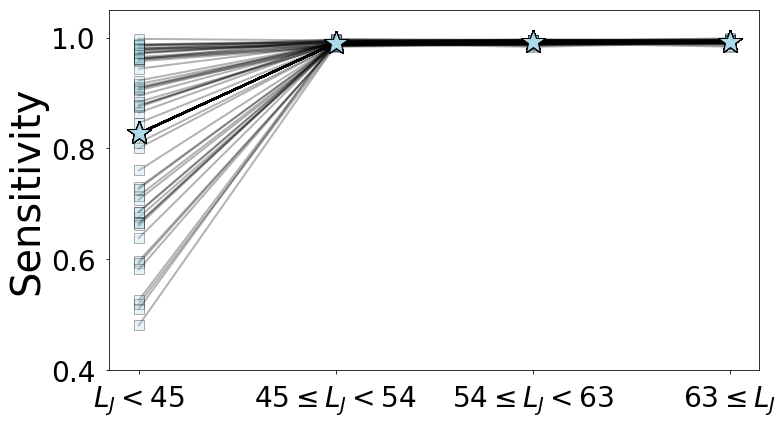

In [42]:
import matplotlib.pyplot as plt
plt.ion()
fig, ax = plt.subplots(figsize=(11,6))
for i in range(0,55):
    if i!=50:
        plt.plot(['$L_J<45$' ,'$45 \leq L_J<54$' ,'$54\leq L_J<63$' ,'$63\leq L_J$'],[table_summary_my.sen_short[i],table_summary_my.sen_mid_a[i],table_summary_my.sen_mid_b[i],table_summary_my.sen_long[i]],marker='s',markersize=10,linewidth=2,c='k',markerfacecolor='lightblue',markeredgecolor='k',alpha=0.3)
        plt.plot(['$L_J<45$' ,'$45 \leq L_J<54$' ,'$54\leq L_J<63$' ,'$63\leq L_J$'],[np.mean(table_summary_my.sen_short[:]),np.mean(table_summary_my.sen_mid_a[:]),np.mean(table_summary_my.sen_mid_b[:]),np.mean(table_summary_my.sen_long[:])],marker='*',markersize=25,linewidth=2,c='k',markerfacecolor='lightblue',markeredgecolor='k')
        ax.xaxis.label.set_fontsize(40)
        ax.yaxis.label.set_fontsize(40)
        ax.tick_params(labelsize=28,pad=10)
        plt.ylabel('Sensitivity')
        ax.set_ylim([0.4,1.05])
plt.tight_layout()
plt.show()
fig.savefig('Junction_len_sen_ref_const_thresh')


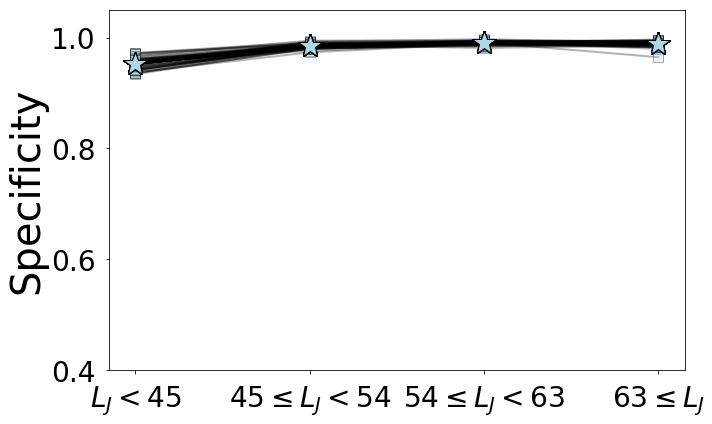

In [43]:


plt.ion()
fig, ax = plt.subplots(figsize=(10,6))
for i in range(0,55):
     
        plt.plot(['$L_J<45$' ,'$45 \leq L_J<54$' ,'$54\leq L_J<63$' ,'$63\leq L_J$'],[table_summary_my.spec_short[i],table_summary_my.spec_mid_a[i],table_summary_my.spec_mid_b[i],table_summary_my.spec_long[i]],marker='s',markersize=10,linewidth=2,c='k',markerfacecolor='lightblue',markeredgecolor='k',alpha=0.3)
        plt.plot(['$L_J<45$' ,'$45 \leq L_J<54$' ,'$54\leq L_J<63$' ,'$63\leq L_J$'],[np.mean(table_summary_my.spec_short[:]),np.mean(table_summary_my.spec_mid_a[:]),np.mean(table_summary_my.spec_mid_b[:]),np.mean(table_summary_my.spec_long[:])],marker='*',markersize=25,linewidth=2,c='k',markerfacecolor='lightblue',markeredgecolor='k')
        ax.xaxis.label.set_fontsize(40)
        ax.yaxis.label.set_fontsize(40)
        ax.tick_params(labelsize=28,pad=10)
        plt.ylabel('Specificity')
        ax.set_ylim([0.4,1.05])
plt.tight_layout()
plt.show()
fig.savefig('Junction_len_spec_ref_const_thresh')

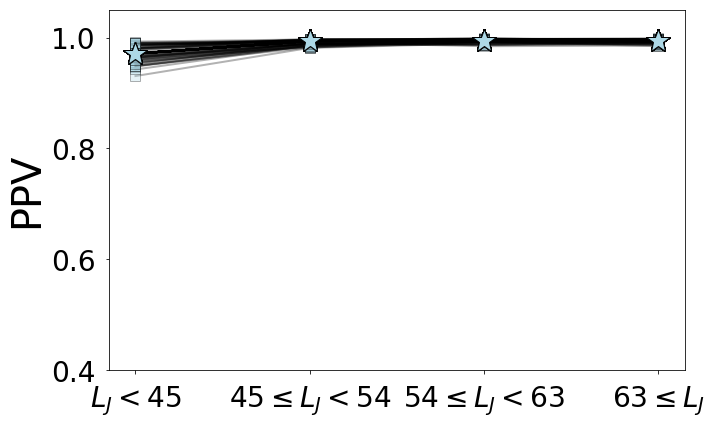

In [44]:


plt.ion()
fig, ax = plt.subplots(figsize=(10,6))
for i in range(0,55):
   
        plt.plot(['$L_J<45$' ,'$45 \leq L_J<54$' ,'$54\leq L_J<63$' ,'$63\leq L_J$'],[table_summary_my.ppv_short[i],table_summary_my.ppv_mid_a[i],table_summary_my.ppv_mid_b[i],table_summary_my.ppv_long[i]],marker='s',markersize=10,linewidth=2,c='k',markerfacecolor='lightblue',markeredgecolor='k',alpha=0.3)
        plt.plot(['$L_J<45$' ,'$45 \leq L_J<54$' ,'$54\leq L_J<63$' ,'$63\leq L_J$'],[np.mean(table_summary_my.ppv_short[:]),np.mean(table_summary_my.ppv_mid_b[:]),np.mean(table_summary_my.ppv_mid_b[:]),np.mean(table_summary_my.ppv_long[:])],marker='*',markersize=25,linewidth=2,c='k',markerfacecolor='lightblue',markeredgecolor='k')
        
        ax.xaxis.label.set_fontsize(40)
        ax.yaxis.label.set_fontsize(40)
        ax.tick_params(labelsize=28,pad=10)
        plt.ylabel('PPV')
        ax.set_ylim([0.4,1.05])

plt.tight_layout()
plt.show()
fig.savefig('PPV_len_spec_ref_const_thresh')

In [45]:
jun_loc=[]
for i in range(0,54):
    table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])
    for j in range(table_ig.shape[0]):
        curr_loc=table_ig.SEQUENCE_INPUT[j].__len__()-table_ig.SEQUENCE_INPUT[j].find(table_ig.JUNCTION[j])
        jun_loc=np.append(jun_loc,curr_loc)

/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
bins=np.arange(50,160,3)

In [47]:
dist2nearesthistA=np.histogram(jun_loc,bins=bins,density=True)

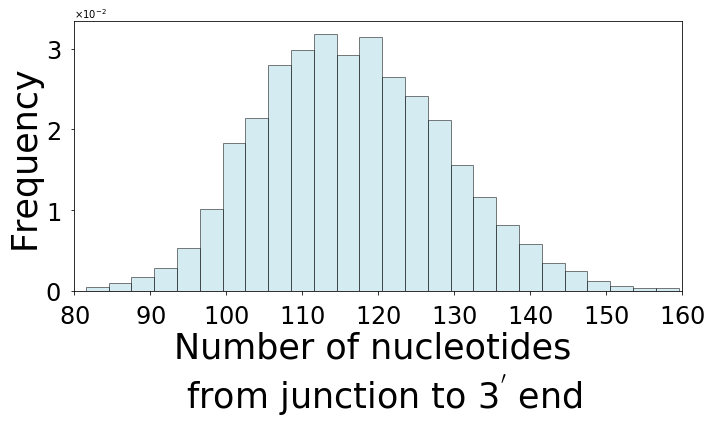

In [49]:
plt.ion()
fig, ax = plt.subplots(figsize=(10,6))
#bins=np.arange(0, 160, 1)
ax.bar(dist2nearesthistA[1][1:],dist2nearesthistA[0], color='lightblue',ec='k', alpha=0.5,width=3)  # arguments are passed to np.histogram

ax.set_xlim([80, 160])

#plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Number of nucleotides \n from junction to $3^{\'}$ end')

plt.ticklabel_format( axis='both', style='', scilimits=None, useOffset=None, useLocale=None, useMathText=True)
plt.ticklabel_format(style='sci',scilimits=(4,3),axis='y')
ax.xaxis.label.set_fontsize(35)
ax.yaxis.label.set_fontsize(35)
ax.tick_params(labelsize=24,pad=10)
plt.tight_layout()
plt.savefig('Figs/Junc_dist')